# Imports

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

pd.options.display.float_format = "{:,.2f}".format


#Library created to ease process
import data_loaders
import model_eval

2024-02-24 21:43:36.188306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loads Data

In [2]:
data_handler = data_loaders.DataHandler('./dataset')

Found 4802 validated image filenames belonging to 11 classes.
Found 687 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.


# Splits Data

In [3]:
# 70/10/20 train/val/test split

train_df, val_df, test_df = data_handler.get_split_data()
train_gen, valid_gen, test_gen = data_handler.get_generators()

# Loads Models and Evaluates

In [4]:

#Loads trained models from file
def load_model_and_history(model_path, history_path):

    # Load the model
    model = load_model(model_path)
    print("Model loaded successfully from", model_path)

    # Load the training history
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
    print("History loaded successfully from", history_path)
    
    return model, history



In [5]:
models_dir = './saved_models/DL_models'

train_class_indices = train_gen.class_indices

FeatExtract_CNN, FeatExtract_History = load_model_and_history(f'{models_dir}/Weather_CNN_Initial_BESTVALLOSS.h5', f'{models_dir}/Weather_CNN_Initial_History.pkl')

FE_evaluator = model_eval.ModelEvaluator(FeatExtract_CNN, FeatExtract_History, test_gen, test_df, train_class_indices)

2024-02-24 21:43:42.049431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded successfully from /Users/dylanmcintosh/Documents/CPSC_542/Assignment_1/saved_models/DL_models/Weather_CNN_Initial_BESTVALLOSS.h5
History loaded successfully from /Users/dylanmcintosh/Documents/CPSC_542/Assignment_1/saved_models/DL_models/Weather_CNN_Initial_History.pkl
43/43 [==============================] - 95s 2s/step


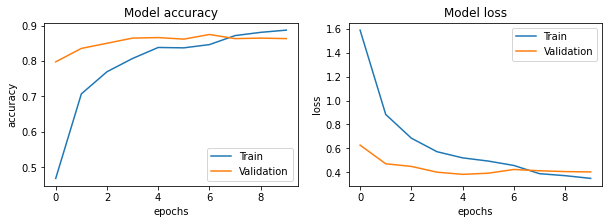

<Figure size 720x576 with 0 Axes>

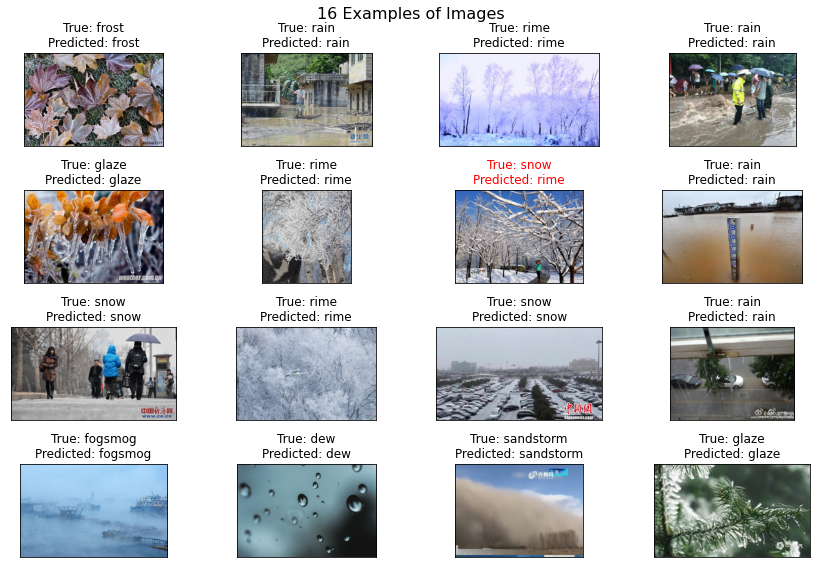

Classification Report:


,precision,recall,f1-score,support
dew,0.99,0.96,0.97,140
fogsmog,0.98,0.96,0.97,170
frost,0.91,0.91,0.91,95
glaze,0.83,0.82,0.82,128
hail,0.93,0.99,0.96,118
lightning,1.00,1.00,1.00,76
rain,0.96,0.91,0.94,105
rainbow,0.96,1.00,0.98,46
rime,0.87,0.93,0.90,232
sandstorm,0.99,0.99,0.99,139


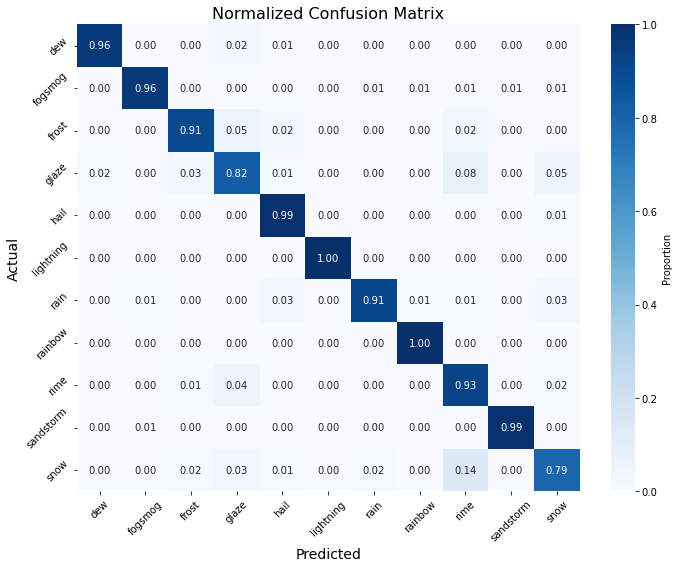

In [6]:
FE_evaluator.full_report()

Model loaded successfully from /Users/dylanmcintosh/Documents/CPSC_542/Assignment_1/saved_models/DL_models/Weather_CNN_FineTuned_best_BESTVALLOSS.h5
History loaded successfully from /Users/dylanmcintosh/Documents/CPSC_542/Assignment_1/saved_models/DL_models/Weather_CNN_FineTuned_best_History.pkl
43/43 [==============================] - 98s 2s/step


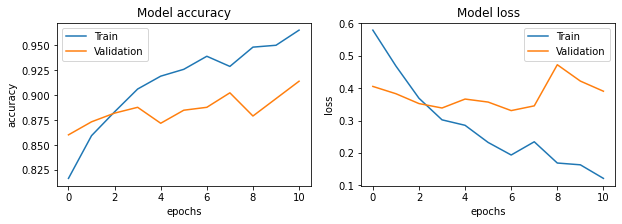

<Figure size 720x576 with 0 Axes>

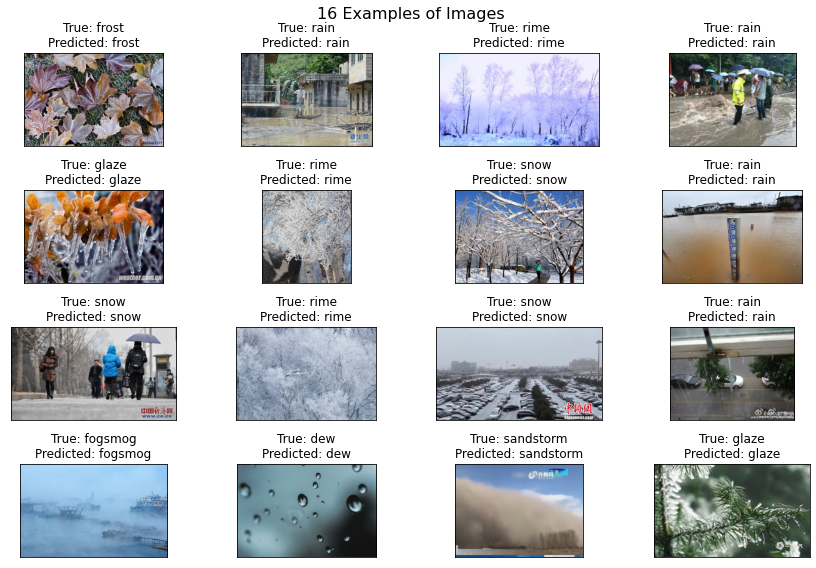

Classification Report:


,precision,recall,f1-score,support
dew,0.99,0.98,0.99,140
fogsmog,0.99,0.98,0.98,170
frost,0.87,0.98,0.92,95
glaze,0.90,0.91,0.91,128
hail,0.91,0.99,0.95,118
lightning,0.99,1.00,0.99,76
rain,0.97,0.91,0.94,105
rainbow,0.96,1.00,0.98,46
rime,0.98,0.93,0.96,232
sandstorm,0.99,0.98,0.99,139


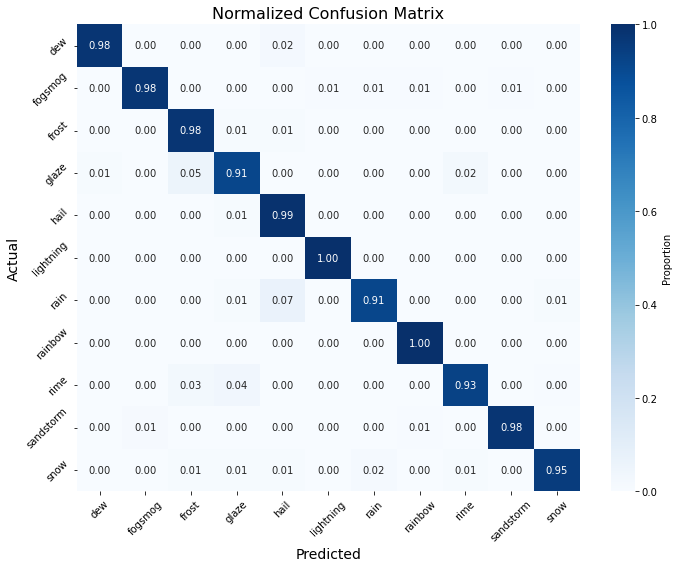

In [7]:
FineTuned_Best_CNN, FineTuned_Best_History = load_model_and_history(f'{models_dir}/Weather_CNN_FineTuned_best_BESTVALLOSS.h5', f'{models_dir}/Weather_CNN_FineTuned_best_History.pkl')

FT_Best_evaluator = model_eval.ModelEvaluator(FineTuned_Best_CNN, FineTuned_Best_History, test_gen, test_df, train_class_indices)

FT_Best_evaluator.full_report()

<Figure size 720x576 with 0 Axes>

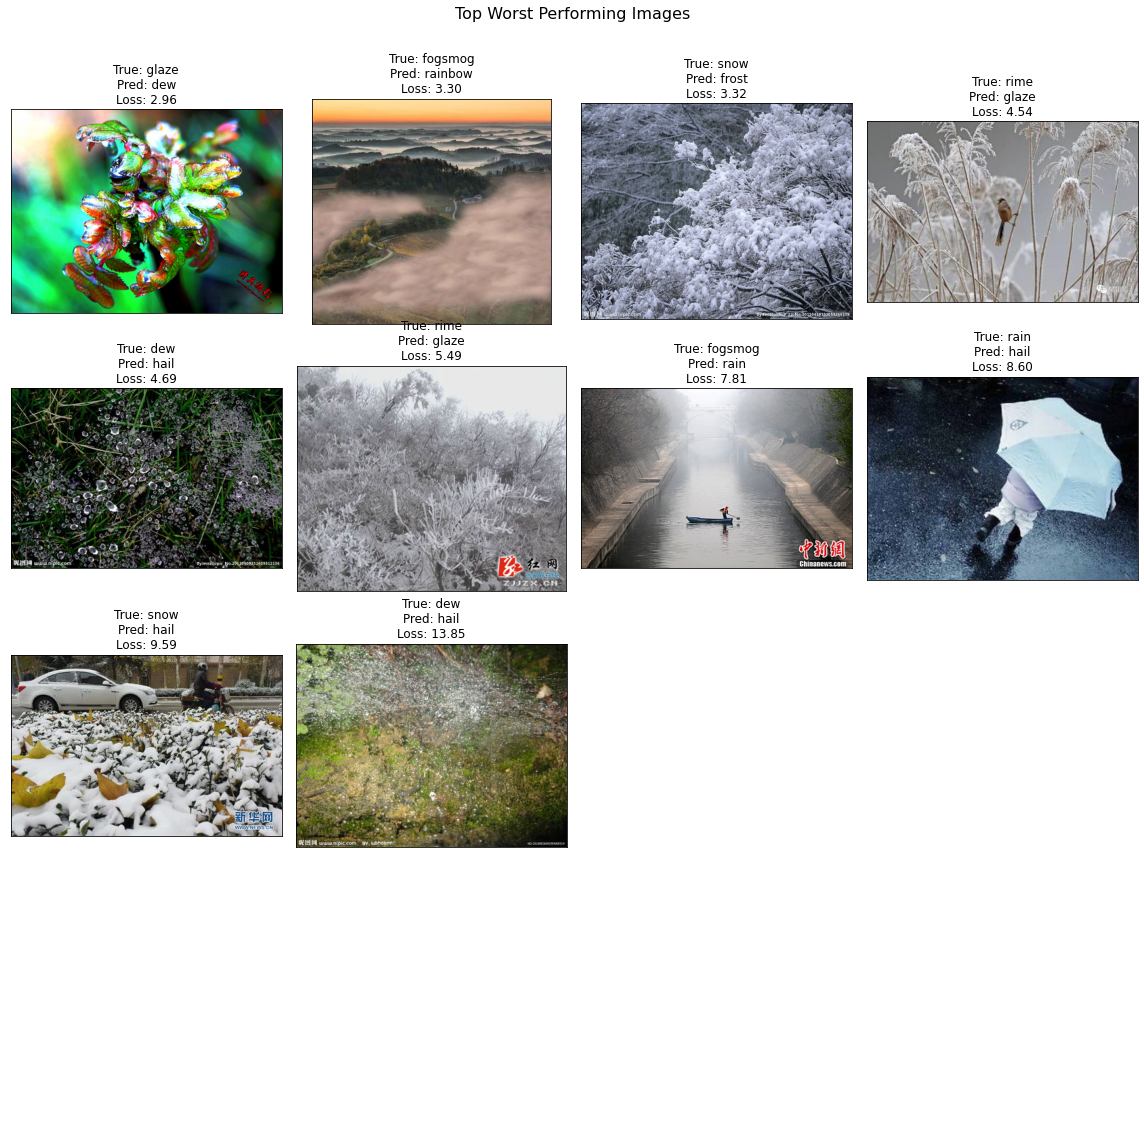

In [8]:
FT_Best_evaluator.display_worst_performing_images(10)

In [9]:
FineTuned_Best_CNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              